In [ ]:
#Import numpy and pandas
import numpy as np
import pandas as pd

# Mount google drive
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Read CSVs as pandas data frames

df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')

In [ ]:
# Create training and testing numpy arrays

# Train/test data for 3 classes
y_train =df_train["class_3"].to_numpy()
y_test = df_test["class_3"].to_numpy()
X_train=df_train.iloc[:,0:4].to_numpy()
X_test=df_test.iloc[:,0:4].to_numpy()

#Train/test data for 2 classes
y_train_binary = df_train["class_2"].to_numpy()
y_test_binary = df_test["class_2"].to_numpy()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Create loop to run KNN with k values 1-50
k_range = (1,50)
scores={}
scores_list=[]
for k in k_range: 
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

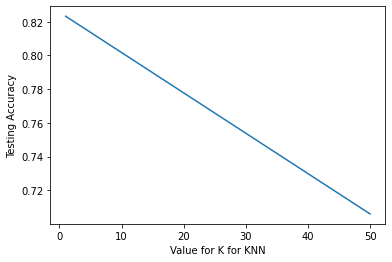

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot accuracy score for k values 1-50

plt.plot(k_range, scores_list)
plt.xlabel('Value for K for KNN')
plt.ylabel('Testing Accuracy')

# The plot shows that the greatest accuracy occurs when k=1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       364
           1       0.78      0.79      0.78       364
           2       0.86      0.79      0.82       364

    accuracy                           0.82      1092
   macro avg       0.82      0.82      0.82      1092
weighted avg       0.82      0.82      0.82      1092



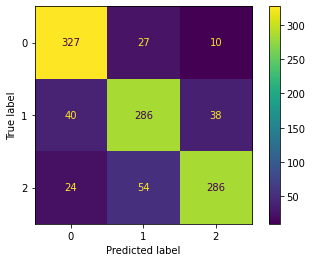

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import timeit


# Train a model where k=2, as k=1 will be overfitted for three variables

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_predict=knn.predict(X_test)

# Create confusion matrix and classification report to evaluate the model

plot_confusion_matrix(knn,X_test,y_test)
print(classification_report(y_test,y_predict))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       364
           1       0.95      0.91      0.93       728

    accuracy                           0.91      1092
   macro avg       0.89      0.91      0.90      1092
weighted avg       0.91      0.91      0.91      1092



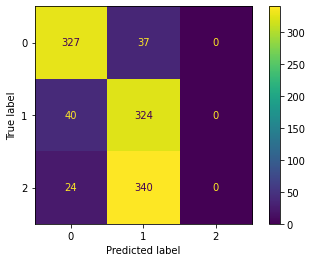

In [ ]:
# Train a model where k=1 for binary classes

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train_binary)
y_predict_binary=knn.predict(X_test)

# Create confusion matrix and classification report to evaluate the model

plot_confusion_matrix(knn,X_test,y_test)
print(classification_report(y_test_binary,y_predict_binary))